# Machine Learning Engineer Nanodegree
## Capstone Project: University Ranking

## Definition

### Project Overview

In this project, we will look at a dataset from a Saudi Arabia based organization. The file is included along with this notebook. 
The name of the dataset/file is "cwurData". The dataset is the ranking of the top 2200 universities in the world. You can also get the data here: https://www.kaggle.com/mylesoneill/world-university-rankings

One consideration for why I choose this dataset over some other dataset, or some other ranking is that no two universities have identical rankings, and that the feature space can be in some sense reduced. For example, "quality of faculty" can be eliminated, because attributes like "quality of education", "alumni employment", and "citation" could just as well be a proxy for it.

The dataset starts off with 8 attributes, and we will reduce the number of attributes down to 5.  These final attributes are "publications"(Measuring the number of papers appearing in reputable journals), "quality of education"(measured by the number of a university's alumni who have won major international awards, prizes, and medals relative to the university's size), "citations"(measured by the number of highly-cited research papers), "alumni employment"(measured by the number of a university's alumni who have held CEO positions at the world's top companies relative to the university's size), and "patents"(measured by the number of international patent filings). 

In this project, we will come up with a regression model that helps us predict world ranking according to this final 5 attributes  listed above. Along the way, we provide a lot of visualizations to aid intuition about the matter.  

### Problem Statement


Suppose you have a couple of billions in inherited money, and your intention is to build a university( Lets call it University of San Jose) that will eventually dethrown the top universities in the world. What should this university be focusing on? Should this university put more emphasize on quality of education, alumni employment, or should it focus more on publications, citations, and patents?  We will find these attributes for our unviersity, and we will find a model using our dataset.

We will solve this problem by looking at the dataset, cwurData.csv accompany this notebook. We will look at each attribute, and their correlation with one another. We will using PCA to reduce the dimensionality of our data so that we can visual our data. We will use a supervised, regression model to model our dataset to approximate "university ranking"( Target Variable). Our model will have a high accuracy rate of 93%. 


### Metrics 

There is three metrics we will be using:
1. Coefficient of Determination
2. Silhouette score
3. Explained Variance


We will use 1 to give us a measure of how well our regression model generalize to out of sample data. This metric indicate the "proportion of variance in the dependent variable that is predictable from the independent variable". It is a number between 0, and 1. The higher the number, the better it is the dependent variable is predicable by the independent variable. 

We will use 2 to for cluster analysis. We will use Silbouette score to help us pick the optimal number of clusters. It is a measure that range from -1 to 1. A score close to 1 means all the points are in their right clusters. A value of 0, or negative means a cluster configuration that may have too few, or too many clusters.

We will use 3 to see how successful we are in reducing the dimensionality of our data from 6 to 2. Explained Variance measures the proportions to which a mathematical model accounts for the variation(dispersion) of a given dataset. It is a number between  0, and 1. The higher the value, the better the mathematical model is at explaining the dispersion of the observed data. 

## Analysis

### Data Exploration

The dataset we will be using accompany this notebook. We will import it into python 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read student data
cwData = pd.read_csv("cwurData.csv")
print "Univeristy data read successfully!"

Univeristy data read successfully!


In [2]:
# number of universities
n_universities = len(cwData)

# Calculate number of columns
n_columns = len (cwData.columns.values)


# Calculate mean ranking
mean_ranking = np.mean(cwData['world_rank'])

# Calculate median ranking
median_ranking = np.median(cwData['world_rank'] )

#Standard deviation for our university ranking
std_ranking = np.std(cwData['world_rank'])

# Print the results
print "Total number of universities: {}".format(n_universities)
print "Number of attributes: {}".format(n_columns)
print "Mean ranking for universities {:.4f}".format(mean_ranking)
print "Median ranking for universities {:.4f}".format(median_ranking)
print "Standard Deviation of ranking of universities {:.4f}".format(std_ranking)


Total number of universities: 2200
Number of attributes: 14
Mean ranking for universities 459.5909
Median ranking for universities 450.5000
Standard Deviation of ranking of universities 304.2512


In [3]:
cwData.head(3)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012


In [4]:
cwData.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [5]:
cwData.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


#### Feature Observation

The mean ranking(459.59) is very close to median ranking(450.5). The spread of the data is large(304.32) relative to the mean. 

We have total of 14 attributes. We would like to reduce the number of attributes down to 6(one being the target variable, and  five being the features).

Most of the attributes are numeric of type int64, or float64. This is good for numerical manipulation, and useful for applying Machine Learning algorithm. 

We have two categorical variables, and they are 'instituitons', and 'country'.

There is a lot of values missing from the 'broad impact' feature. 



#### Data Preprocessing

Given the observations made in Feature Observation. We would like to reduce the number of attributes down from 14 to 6. 

We will drop columns from cwData. They are 'institution', 'country', 'national_rank',  'quality_of_faculty', 'broad_impact', 'influence', 'score', and 'year'. What remains are: 'world_rank', 'quality_of_education', 'alumni_employment','publications', 'citations', 'patents'.

We drop 'institution', and 'country', because our ranking should not be depended on the name of university, or where the university is from. National_rank should not matter, because it is not relevant to global ranking of universities. We drop 'quality_of_faculty' because it might best be captured by measures like publications, citations, patents, and quality of education. We drop broad_impact because it might be better captured by measures like publication, citations, alumni_employment. We drop 'influence', 'score' for similar reasons as we drop 'broad_impact'.  We drop 'year' because university ranking should not be depended on the shift in time. 



In [6]:
drop_cols= ['institution', 'country', 'national_rank',  'quality_of_faculty', 'broad_impact', 'influence', 'score', 'year']

data=cwData.drop(drop_cols, axis =1)
data.head()

,world_rank,quality_of_education,alumni_employment,publications,citations,patents
0,1,7,9,1,1,5
1,2,9,17,12,4,1
2,3,17,11,4,2,15
3,4,10,24,16,11,50
4,5,2,29,37,22,18


In [7]:
data.dtypes

world_rank              int64
quality_of_education    int64
alumni_employment       int64
publications            int64
citations               int64
patents                 int64
dtype: object

#### Identifying Outliers

In [8]:
for feature in data.keys():
    
    Q1 = np.percentile(data[feature], 25)
    
    Q3 = np.percentile(data[feature], 75)

    step = (Q3-Q1)*1.5
    
    n=len(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    
    print "The number of Data points considered outliers for the feature '{}' : {} ".format(feature, n)
    

The number of Data points considered outliers for the feature 'world_rank' : 0 
The number of Data points considered outliers for the feature 'quality_of_education' : 0 
The number of Data points considered outliers for the feature 'alumni_employment' : 0 
The number of Data points considered outliers for the feature 'publications' : 0 
The number of Data points considered outliers for the feature 'citations' : 0 
The number of Data points considered outliers for the feature 'patents' : 0 


#### Feature observation on data

We have droped a few columns from cwData, and assign it to a new variable which we call data.  

data contains 6 features. Each of the 6 features has numeric type of int64. This is good for apply our machine learning algorithm.

There is no outliers if we define outlers to be defined by Tukey 's rule. 

### Exploratory Visualization

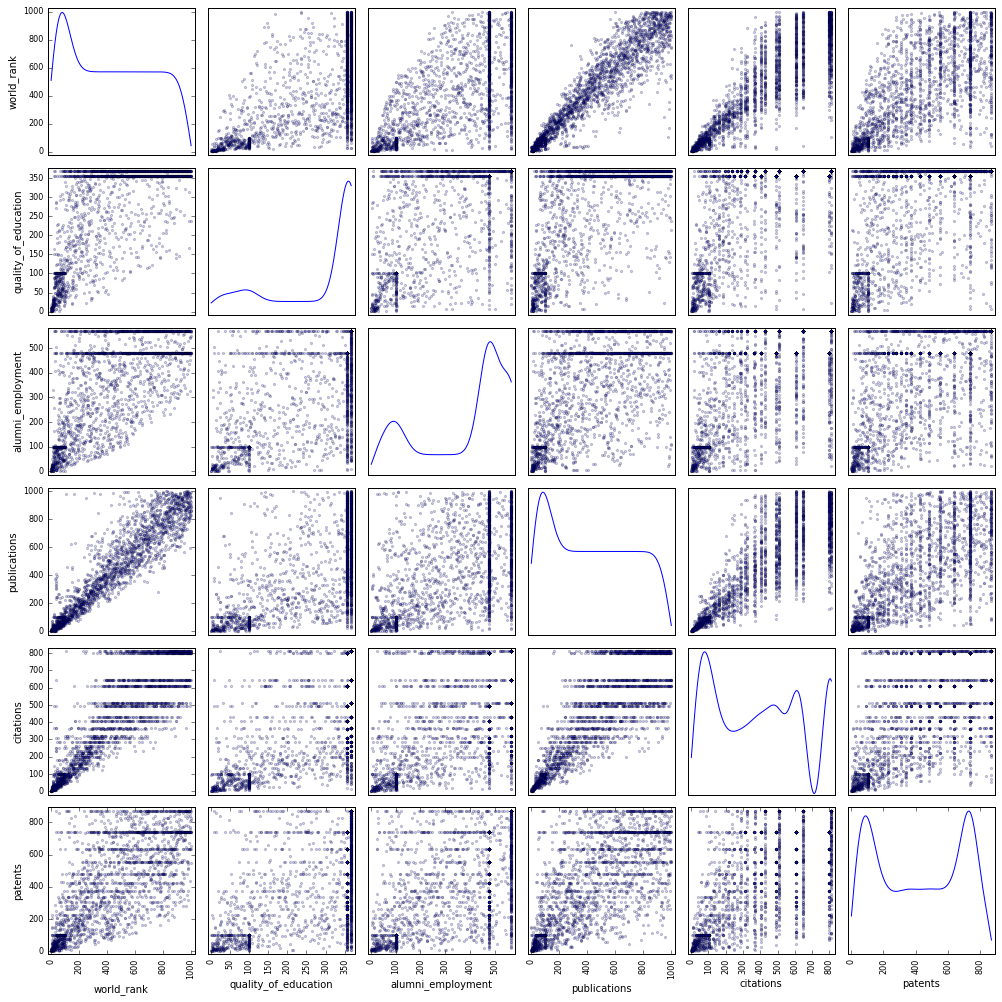

In [9]:
%matplotlib inline

from pandas.tools.plotting import scatter_matrix

scatter_matrix(data, alpha=0.2, figsize=(14, 14), diagonal='kde')
plt.tight_layout()

#### Visualize Feature Distributions

To get a better understanding of the data, we used a scatter matrix to visualize each of the six features in our dataset. We found that there is some  correlation between the different features.  There seems to be high correlation between "publications", and "world ranking".  A someewhat surprising observation is that there seems to be very little correlation between alumni_employment, and quality of education.

### Algorithms and Techniques

Principle Component Analysis(PCA) - We will use PCA to reduce the dimensionality of our dataset from 6 to 2. We will look at the first dimensions, and attempt to get inspired on what to pick for our features to predict world ranking. 

K-means - Once we reduce the dimensionality of our data from 6 to 2. We would want to visualize it using a clustering algorithm such as K-means. 

DecisionTreeRegressor- After getting some hints by looking at the dataset from 2 dimensions(Obtained from our PCA), we pick varies attributes to use to train our DecisionTreeRegression model.

GridSearchCV- We use gride search to fine ture the height of our tree. 




#### Why Decision Tree?

Our problem is a supervised, regression type problem. Our target variables are the ranks of universities( between 1 and 2200). We idealize the target variable as a continuum between 0 and 2200, allow fractional rankings ( i.e. 243.3, 834.43 ). Because of the continuous, ordered nature of our target variables, we are constrained to use a supervised learning, regression algorithm. I used decison tree, because of its interpretibility. Speed is a unconsequential factor for me, because my interest is in accuracy of the model. I wanted a model that accurately model the underlying phenonmen. For people who's preference is speed, and use, this classifer is a eager learner. It might take time, and space complexity to build the tree, but once, the tree is build, and trained, prediction is constant time.  I also anticiplated the risk of overfitting, but as long as I minimize the testing error by tuning the height of the tree, this would not be a problem. 




#### Why PCA?

There is two primary reason I used PCA. Firstly, I want to reduce the dimensionality of my data from 6 to 2, so that I can visually represent it using a cluster diagram. Secondly, I want to see the relative wight of each feature with respect to dimension 1. Because of this two reason, PCA is an ideal choice. 

### Benchmark

Our model will be successful if our Coefficient of Determination for our regression model is high. How do we define high? That seems arbitrary, and subjective. I think it is hard to not be subjective, but I define high to be such that the coefficient of determination is above .90( out of 1). 

Our reduction of dimension from 6 to 2 using PCA will be successful if our explained variance for dimension 1 + dimension 2 is high. High here is again very subjective. I define high here to be some value .80(out of 1 )+ if both dimension 1, and dimension 2 explains 80%+ of the variations in the data. 

Our visual representation of data in dimension 1, and dimension 2 ( After PCA give this to us) is accurate if the number of clusters we have is accurate. The number of clusters is accurate enough if our Silhouette score is above mere chance. A silhouette score of 0 indicates overlapping clusters. silhouette score is a number bween -1 to +1. So, if we have a silhouette score above 0, and positive, it is a good chance that we the right cluster. I will set that benchmark to any number above .5 to be "good enough".



## Methodology

## Implementation

The purpose of principle componenet analysis is to reduce the dimensionality of our dataset from 6 to 2 so that we can visualize the data in terms of clusters. This is to motivate why we use the features that we do, and give readers some intuition on the dataset. The main motive is to come up with a supervised, regression model to fit our data, and for that, we use Decision Tree Regressor on the features of our dataset. To refine our model( Decision Tree Regressor), we uses grid search to fine tune the right height for our tree.   

### Viability of principle component analysis

In order to visualize the different dimensions using PCA. We will use the renders.py file. We will also use that file to visualize clusters. We will also avoid scaling the data, because by scaling the features actually results in a lowering of explained variance for the first two dimensions.  

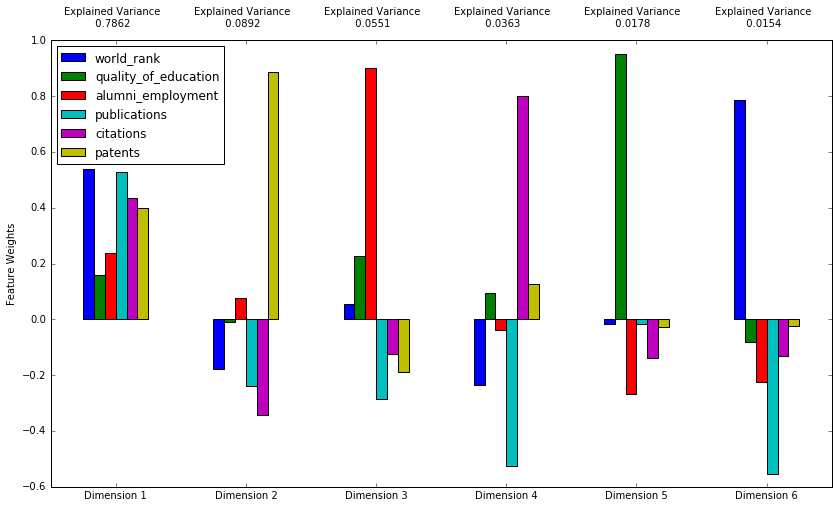

In [10]:
#import libaries
from sklearn.decomposition import PCA
import renders as rs

pca = PCA(n_components=6)
pca.fit(data)
pca_results = rs.pca_results(data, pca)

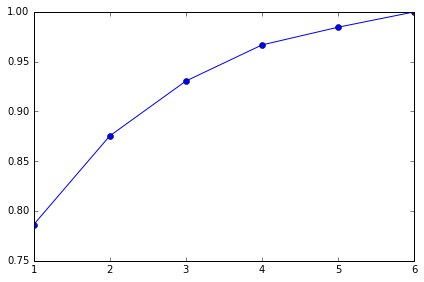

In [11]:
import matplotlib.pyplot as plt
x = np.arange(1, 7)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')
plt.tight_layout()

As we can see much of the variance in the data is explained by the first and second principal component( .7862+.0892 = .8754 ). 87.54% of the variance of the data is explained by the first 2 dimensions. This gives us confidence in reducing the dimensionality of our data from 6 to 2. 

Dimension 1:
With increase in dimension one represent increate in world_ranking, publications, citations and patents, and a much smaller increase in quality of education, and alumni employment.  This dimension also have a high correlation between world ranking, and publication. It is also the dimension with the most "spread" of the data with some universities with high world ranking is also high in publication, citations, and patents. 

Dimension 2:
With increase in dimension two represent increate in patents, and a decrease in everything else. It is also the dimension with the second most "spread" of the data. We have universities that have high positive weight for patents, while they have low negative weight for publications, citations, and world ranking. 




### Dimensionality Reduction

Since our explained variance is high. We ough to have confidence in our dimensionality reduction. 

In [12]:
pca = PCA(n_components=2)
pca.fit(data)

reduced_data = pca.transform(data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
reduced_data.head()

,Dimension 1,Dimension 2
0,-965.255748,-72.468579
1,-956.983658,-79.242919
2,-956.112204,-64.950020
3,-929.394150,-38.924566
4,-925.823029,-75.810731


### Visualizing our data in reduced dimensions

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 10):
 
    clusterer = KMeans(n_clusters=n_cluster ,n_init=20, max_iter=300)

    clusterer.fit(reduced_data)

    preds = clusterer.predict(reduced_data)

    centers = clusterer.cluster_centers_
    
    score =  silhouette_score(reduced_data, preds)
    print "for cluster = {}, the silhouette score is={}".format(n_cluster, score)

for cluster = 2, the silhouette score is=0.561433790075
for cluster = 3, the silhouette score is=0.476592546581
for cluster = 4, the silhouette score is=0.409371200639
for cluster = 5, the silhouette score is=0.43533155684
for cluster = 6, the silhouette score is=0.427350473677
for cluster = 7, the silhouette score is=0.432562235981
for cluster = 8, the silhouette score is=0.423574323099
for cluster = 9, the silhouette score is=0.415415414358


Since we have highest silhouette score for the number of clusters being equal to 2.  We ought to be confident that the number of clusters visually depicted ought to be two.

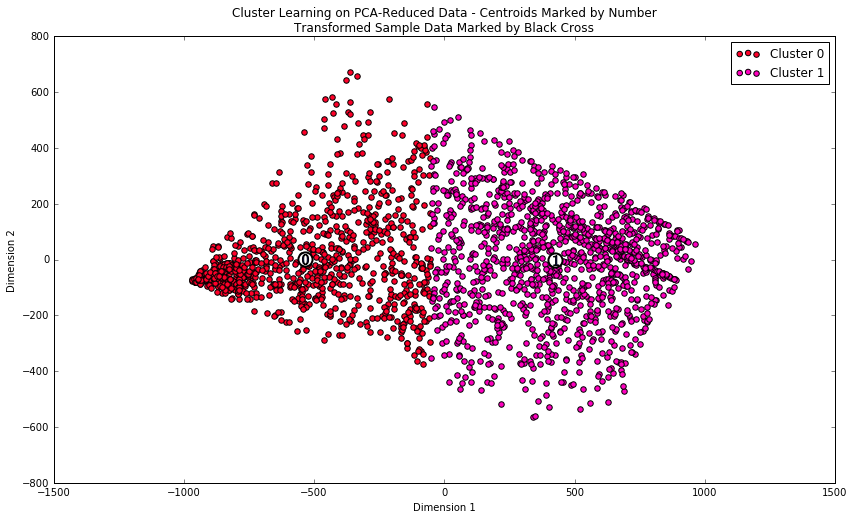

In [14]:
clusterer = KMeans(n_clusters=2,n_init=20, max_iter=300)

clusterer.fit(reduced_data)

preds = clusterer.predict(reduced_data)

centers = clusterer.cluster_centers_

rs.cluster_results(reduced_data, preds, centers)



### Observations

We see that data seems to cluster in the two extremes of dimension 1 (See Diagram Above).

In the direction of increasing dimension 1, we see greater weights in 'publications', 'citations', and 'patents', and to a lesser extend in Alumni employment, and education quality(from 'Viability of principle component analysis' above). 

We see high correlation between 'world_ranking', and 'publication'( from 'Exploration Visualization' scatter matrix above)

Our choice of features which we use to predict 'world ranking' is suggestive by our observation so far. If I have to guess, I would say Dimension 1( From our PCA) suggest to us that world rank is best predicted by all five features.

### Fitting data using Decision Tree Regressor





In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

Below, We attempt to use only 'publications', and 'citations' to predict world rank. 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data[['publications', 'citations']], data['world_rank'], test_size=0.25, 
                                                    random_state=0)
regressor = DecisionTreeRegressor(random_state=1, max_depth=5)
regressor.fit(X_train, y_train)
score = regressor.score(X_test, y_test)
score

0.8619638080045563

Below, We attempt to use only 'publications', 'citations', and 'patents' to predict 'world rank'.

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(data[['publications', 'citations', 'patents']], data['world_rank'], test_size=0.25, 
                                                    random_state=0)
regressor = DecisionTreeRegressor(random_state=1, max_depth=5)
regressor.fit(X_train, y_train)

score = regressor.score(X_test, y_test)
score

0.8620673172018456

Below, We are trying to predict world_rank from all the 5 other features.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('world_rank',axis =1), data['world_rank'], test_size=0.25, 
                                                    random_state=0)
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)
score = regressor.score(X_test, y_test)
score

0.88268491663516457

From the above 3 scores, using all 5 features to predict world ranking has the best testing accuracy. We will try to improve this estimate using GridSearchCV.

### Improvement using Grid Search

We will improve our best guess from above using grid search to search for trees with the optimal tree depth

In [19]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict) 
    return score

In [20]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

def fit_model(X, y):
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    regressor = DecisionTreeRegressor()
    params = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
    scoring_fnc = make_scorer (performance_metric,greater_is_better=True)
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc )
    grid = grid.fit(X, y)
    return grid.best_estimator_

In [21]:
reg = fit_model(data.drop('world_rank',axis =1), data['world_rank'])
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 7 for the optimal model.


The optimal model seems to be a tree with depth of 7. Applying this knowledge below, we obtain an estimate.

In [22]:
X=data.drop('world_rank',axis =1)
y=data['world_rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,  random_state=0)
regressor = DecisionTreeRegressor(random_state=1, max_depth=7)
regressor.fit(X_train, y_train)
score = regressor.score(X_test, y_test)
score

0.93241215468549277

Our Coefficient of Determination is highest at 0.93241215468549277 for regression tree of depth=7, and using all 5 features to predict 'world ranking'

### Refinement

We found that for a DecisionTreeRegression model with depth= 7, and using all 5 features to predict 'world rank' is the best model, because it has the highest coefficient of Determination so far of 0.93241215468549277


The process of improvement is documented. We initially try different features to improve our Ceofficient of Determination. After  we found that using all five features give us the high score, we use grid search to fine tune the depth of our tree to give us an even better coefficient of Determination.





## Results

### The Final Model

The final model is a decision tree regressor of depth 7. We arrived at this model by trying successively different features in the methodology section. We arrive at the best tree depth by using gridsearchCV. Our final model have an cofficient of determination of 0.93241215468549277. Our benchmark for the coefficient of determination is over .9. Since we have .93.  We are successful

### Model Evaluation and Validation 

Our model after fine tuning has coefficient of determination of .9324. Our benchmark was .9. We are successful.

We split our dataset into training, and testing set, and using the train set on our regression model, and test it in our testing set. We find that our Coefficient of Determination is around .9324.

For testing sizing of 20%, our coefficient of determination is 0.93477733889241732

For testing sizing of 22%, our coefficient of determination is 0.93489110072193204

For testing sizing of 25%, our coefficient of determination is 0.93241215468549277

For testing sizing of 28%, our coefficient of determination is 0.92772547330236477

For testing sizing of 30%, our coefficient of determination is 0.92957972329808003

For testing sizing of 32%, our coefficient of determination is 0.92931131677839218


The above are coefficient of determinations when we varies the testing size between 20% to 32%. As we can see, the coefficient of determination varies from 0.92931131677839218 to 0.93477733889241732. The coefficient of determination is relatively robust. Huge changes in the testing size from 20% to 32% yield a very small change in the coefficient of determination.




### Justification



We reduced the dimensionality of our dataset from 6 to 2, and we can reasonablity trust that result because dimension 1 +dimension 2 given to us by PCA have an explained variance of .875( above our .85 benchmark). 

We can reasonably trust our cluster representation. The reason being that we can 1. reasonable trust our dimensional reduction from 6 to 2, and 2. Our highest silhouette score yield a cluster number of two. 

We use a DecisionTreeRegressor Model for our problem, and we can be confident of its success because of its high Coefficient of Determination score. We use grid Search to find the optimal depth for our tree. That depth is 7.  

The solution of our problem is a model: A Decision tree Regressor with depth 7 using all 5 features in the dataset to predict world ranking. Our Solution is good if the coefficient of determination for our model is high. Our coefficient of determination is .9324, which is above our benchmark of .9.


 



## Conclusion

### Free-Form Visualization

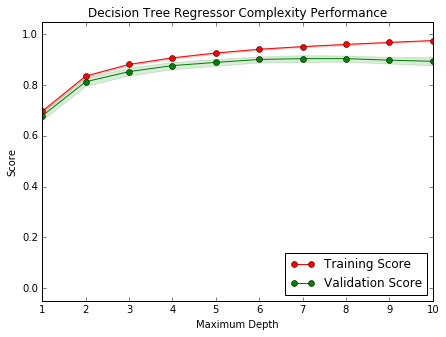

In [23]:
import visuals as vs

vs.ModelComplexity(X_train, y_train)

The graph above shows our model( Decision Tree Regressor) is graphed with score( Coefficient of Determination) over Maximum Depth. Training accuracy is in red, and validation/testing accurcy is in green. Training accuracy tend to approach 1 as maximum depth increase. Validation/testing accuracy tend to peak at around 7. 

This graph confirms our results using grid search. Using grid search, we found that the optional tree is at depth 7. From looking at this graph, we can also see validation/testing score peak at 7. 
        

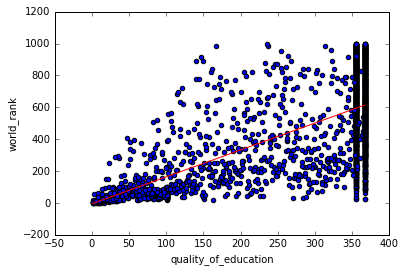

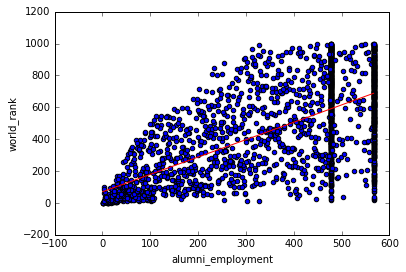

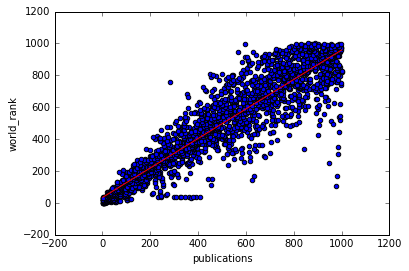

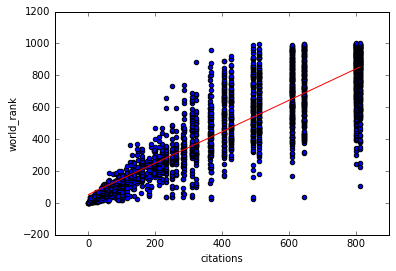

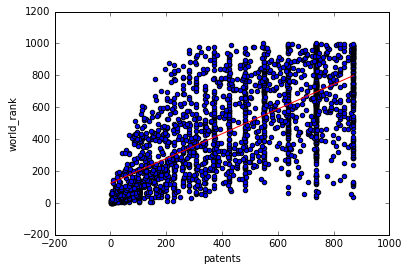

In [24]:
for feature in ["quality_of_education", "alumni_employment", "publications",  "citations","patents" ]:
    ax = data.plot(kind="scatter", x=feature,y="world_rank")
    w1, w0 = np.polyfit(data[feature],data["world_rank"],deg=1)
    rng = np.arange(np.min(data[feature]),np.max(data[feature]),0.1)
    ax.plot(rng,[w0+w1*x for x in rng],color="red")

In the five illustrations above, we plot world ranking over the five features. Note that there seems to be a strong correlation between world ranking, and publication.

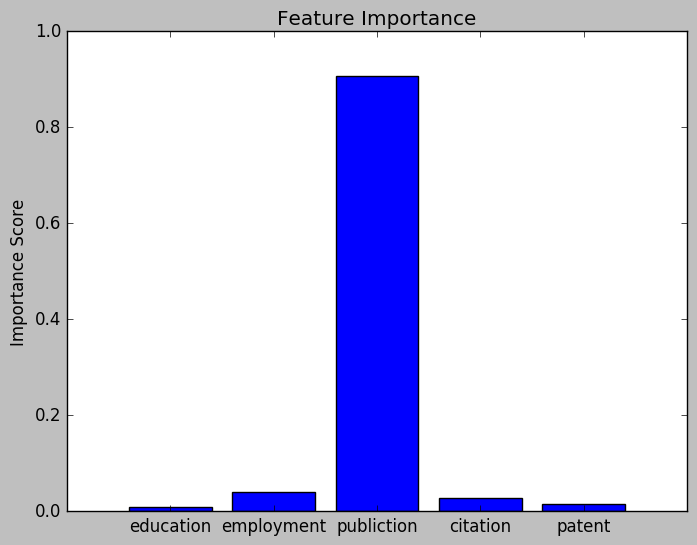

In [25]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('education', 'employment', 'publiction','citation', 'patent')
y_pos = np.arange(len(objects))
performance = regressor.feature_importances_
 
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.figure(figsize=(18, 20))
plt.show()


When we plot the feature importances for our regressor tree, publications seems to be the most important when it comes to predicting  world ranking. 

### Reflection

We began the project with a dataset with 14 features. We reduce the features down to 6. It is hard to visualize data in 6 dimensions, so we reduce it to down to 2 dimension using PCA. We graph it, and found that the best way to visualize it is with two clusters. We then try different guesses for our features(with inspiration from our visual representations), and come up with a decision Tree regressor model using all 5 features to predict world ranking. We fine tune our model so that we have a tree of depth of 7.

One interesting aspect of the project is that I get to use all the stuff I am taugh from the Nanodegree. I get to use supervise learning, regression, PCA, clustering, visualization, outlier detection, bias_variance trade off material. 

I did not came with any expectation of the problem, or solutions. I follow step by step by doing analysis on the data, and visualization to gain an intuition. I think the model can best be used for all types of problems related to ranking of universities. 




### Improvement

Our model is reasonably well, but some possible improvements is to perhaps include categorical varies like country. Does the ranking of universities depend on what country they are in? If a university is build in America, does it confer a higher ranking than a university build in Uganda, all else being equal? I would like to think it does not matter, but perhaps it does. 

I am interested in using Random Forest to fine tune the right tree, or perhaps using SVM,  but because I can do just as well using regression tree, I decide to go against it. 

I think I can improve the final Coefficient of Determination of 0.93241215468549277 perhaps by searching the right tree, or using SVM. 